In [1]:
from astropy.table import Table, Column
import pandas as pd
import numpy as np

In [2]:
data = Table.read('/arc/home/aydanmckay/input_catalogue_fullset.fits')

In [3]:
data.columns

<TableColumns names=('RA_apo','DEC','RV_TEFF','RV_LOGG','RV_FEH','RV_ALPHA','TEFF_apo','TEFF_ERR','TEFF_SPEC_apoeso','LOGG_apo','LOGG_ERR','LOGG_SPEC_apoeso','FE_H_aers','FE_H_SPEC','FE_H_ERR','FE_H_FLAG','ALPHA_M','ALPHA_M_ERR','angDist_apo','RA_eso','DECLINATION','TEFF_eso','E_TEFF_aers','LOGG_eso','E_LOGG_aers','FEH','E_FEH','angDist_eso','ra_input','dec_input','teff_cal_madera','teff_error_madera','logg_cal_madera','logg_error_madera','m_h_cal_madera','m_h_error_madera','angDist_rav','PLUG_RA','PLUG_DEC','TEFF_SPEC_ravseg','TEFF_SPEC_UNC','LOGG_SPEC_ravseg','LOGG_SPEC_UNC','FEH_SPEC','FEH_SPEC_UNC','angDist_seg','ra_dr2','dec_dr2','teff','e_teff_galleg','logg','e_logg_galleg','fe_h_galleg','e_fe_h','flag_fe_h','alpha_fe','e_alpha_fe','flag_alpha_fe','angDist','ra_obs','dec_obs','FEH_APOGEE','AFE_APOGEE','LOGG_APOGEE','TEFF_PASTEL','LOGG_PASTEL','FEH_PASTEL','err_teff_pastel','err_feh_pastel','err_logg_pastel','err_feh_apogee','err_afe_apogee','err_logg_apogee','angDist_cds','Source

In [4]:
teffs = np.nanmean([data['RV_TEFF'],data['TEFF_apo'],data['TEFF_SPEC_apoeso'],data['TEFF_eso'],data['teff_cal_madera'],
                    data['TEFF_SPEC_ravseg'],data['teff'],data['TEFF_PASTEL']],axis=0)

/tmp/ipykernel_5095/2551906234.py:1: RuntimeWarning: Mean of empty slice
  teffs = np.nanmean([data['RV_TEFF'],data['TEFF_apo'],data['TEFF_SPEC_apoeso'],data['TEFF_eso'],data['teff_cal_madera'],


In [5]:
fehs = np.nanmean([data['RV_FEH'],data['FE_H_aers'],data['FE_H_SPEC'],data['FEH'],data['m_h_cal_madera'],
                   data['FEH_SPEC'],data['fe_h_galleg'],data['FEH_APOGEE'],data['FEH_PASTEL']],axis=0)

/tmp/ipykernel_5095/1272639861.py:1: RuntimeWarning: Mean of empty slice
  fehs = np.nanmean([data['RV_FEH'],data['FE_H_aers'],data['FE_H_SPEC'],data['FEH'],data['m_h_cal_madera'],


In [6]:
loggs = np.nanmean([data['RV_LOGG'],data['LOGG_apo'],data['LOGG_SPEC_apoeso'],data['LOGG_eso'],data['logg_cal_madera'],
                    data['LOGG_SPEC_ravseg'],data['logg'],data['LOGG_APOGEE'],data['LOGG_PASTEL']],axis=0)

/tmp/ipykernel_5095/126464191.py:1: RuntimeWarning: Mean of empty slice
  loggs = np.nanmean([data['RV_LOGG'],data['LOGG_apo'],data['LOGG_SPEC_apoeso'],data['LOGG_eso'],data['logg_cal_madera'],


In [7]:
bpcs = data['bp_coefficients'].data
rpcs = data['rp_coefficients'].data
bpecs = data['bp_coefficient_errors'].data
rpecs = data['rp_coefficient_errors'].data

In [8]:
t = Table([teffs, fehs, loggs], names=['Teff', 'Fe/H', 'log_g'])

In [9]:
names=["bp_1", "bp_2", "bp_3", "bp_4", "bp_5", "bp_6", "bp_7",
       "bp_8", "bp_9", "bp_10", "bp_11", "bp_12", "bp_13", "bp_14",
       "bp_15", "bp_16", "bp_17", "bp_18", "bp_19", "bp_20", "bp_21",
       "bp_22", "bp_23", "bp_24", "bp_25", "bp_26", "bp_27", "bp_28",
       "bp_29", "bp_30", "bp_31", "bp_32", "bp_33", "bp_34", "bp_35",
       "bp_36", "bp_37", "bp_38", "bp_39", "bp_40", "bp_41", "bp_42",
       "bp_43", "bp_44", "bp_45", "bp_46", "bp_47", "bp_48", "bp_49",
       "bp_50", "bp_51", "bp_52", "bp_53", "bp_54", "bp_55"
      ]
[t.add_column(bpc,name=name) for bpc,name in zip(bpcs.T,names)]
names=["rp_1", "rp_2", "rp_3", "rp_4", "rp_5", "rp_6", "rp_7", "rp_8",
       "rp_9", "rp_10", "rp_11", "rp_12", "rp_13", "rp_14", "rp_15",
       "rp_16", "rp_17", "rp_18", "rp_19", "rp_20", "rp_21", "rp_22",
       "rp_23", "rp_24", "rp_25", "rp_26", "rp_27", "rp_28", "rp_29",
       "rp_30", "rp_31", "rp_32", "rp_33", "rp_34", "rp_35", "rp_36",
       "rp_37", "rp_38", "rp_39", "rp_40", "rp_41", "rp_42", "rp_43",
       "rp_44", "rp_45", "rp_46", "rp_47", "rp_48", "rp_49", "rp_50",
       "rp_51", "rp_52", "rp_53", "rp_54", "rp_55"
      ]
[t.add_column(rpc,name=name) for rpc,name in zip(rpcs.T,names)]
names=["bpe_1", "bpe_2", "bpe_3", "bpe_4", "bpe_5", "bpe_6", "bpe_7",
       "bpe_8", "bpe_9", "bpe_10", "bpe_11", "bpe_12", "bpe_13", "bpe_14",
       "bpe_15", "bpe_16", "bpe_17", "bpe_18", "bpe_19", "bpe_20", "bpe_21",
       "bpe_22", "bpe_23", "bpe_24", "bpe_25", "bpe_26", "bpe_27", "bpe_28",
       "bpe_29", "bpe_30", "bpe_31", "bpe_32", "bpe_33", "bpe_34", "bpe_35",
       "bpe_36", "bpe_37", "bpe_38", "bpe_39", "bpe_40", "bpe_41", "bpe_42",
       "bpe_43", "bpe_44", "bpe_45", "bpe_46", "bpe_47", "bpe_48", "bpe_49",
       "bpe_50", "bpe_51", "bpe_52", "bpe_53", "bpe_54", "bpe_55"
      ]
[t.add_column(bpec,name=name) for bpec,name in zip(bpecs.T,names)]
names=["rpe_1", "rpe_2", "rpe_3", "rpe_4", "rpe_5", "rpe_6", "rpe_7",
       "rpe_8", "rpe_9", "rpe_10", "rpe_11", "rpe_12", "rpe_13", "rpe_14",
       "rpe_15", "rpe_16", "rpe_17", "rpe_18", "rpe_19", "rpe_20", "rpe_21",
       "rpe_22", "rpe_23", "rpe_24", "rpe_25", "rpe_26", "rpe_27", "rpe_28",
       "rpe_29", "rpe_30", "rpe_31", "rpe_32", "rpe_33", "rpe_34", "rpe_35",
       "rpe_36", "rpe_37", "rpe_38", "rpe_39", "rpe_40", "rpe_41", "rpe_42",
       "rpe_43", "rpe_44", "rpe_45", "rpe_46", "rpe_47", "rpe_48", "rpe_49",
       "rpe_50", "rpe_51", "rpe_52", "rpe_53", "rpe_54", "rpe_55"
      ]
[t.add_column(rpec,name=name) for rpec,name in zip(rpecs.T,names)];

In [10]:
t

Teff,Fe/H,log_g,bp_1,bp_2,bp_3,bp_4,bp_5,bp_6,bp_7,bp_8,bp_9,bp_10,bp_11,bp_12,bp_13,bp_14,bp_15,bp_16,bp_17,bp_18,bp_19,bp_20,bp_21,bp_22,bp_23,bp_24,bp_25,bp_26,bp_27,bp_28,bp_29,bp_30,bp_31,bp_32,bp_33,bp_34,bp_35,bp_36,bp_37,bp_38,bp_39,bp_40,bp_41,bp_42,bp_43,bp_44,bp_45,bp_46,bp_47,bp_48,bp_49,bp_50,bp_51,bp_52,bp_53,bp_54,bp_55,rp_1,rp_2,rp_3,rp_4,rp_5,rp_6,rp_7,rp_8,rp_9,rp_10,rp_11,rp_12,rp_13,rp_14,rp_15,rp_16,rp_17,rp_18,rp_19,rp_20,rp_21,rp_22,rp_23,rp_24,rp_25,rp_26,rp_27,rp_28,rp_29,rp_30,rp_31,rp_32,rp_33,rp_34,rp_35,rp_36,rp_37,rp_38,rp_39,rp_40,rp_41,rp_42,rp_43,rp_44,rp_45,rp_46,rp_47,rp_48,rp_49,rp_50,rp_51,rp_52,rp_53,rp_54,rp_55,bpe_1,bpe_2,bpe_3,bpe_4,bpe_5,bpe_6,bpe_7,bpe_8,bpe_9,bpe_10,bpe_11,bpe_12,bpe_13,bpe_14,bpe_15,bpe_16,bpe_17,bpe_18,bpe_19,bpe_20,bpe_21,bpe_22,bpe_23,bpe_24,bpe_25,bpe_26,bpe_27,bpe_28,bpe_29,bpe_30,bpe_31,bpe_32,bpe_33,bpe_34,bpe_35,bpe_36,bpe_37,bpe_38,bpe_39,bpe_40,bpe_41,bpe_42,bpe_43,bpe_44,bpe_45,bpe_46,bpe_47,bpe_48,bpe_49,bpe_50,bpe_51,bpe_52,bpe_53,bpe_54,bpe_55,rpe_1,rpe_2,rpe_3,rpe_4,rpe_5,rpe_6,rpe_7,rpe_8,rpe_9,rpe_10,rpe_11,rpe_12,rpe_13,rpe_14,rpe_15,rpe_16,rpe_17,rpe_18,rpe_19,rpe_20,rpe_21,rpe_22,rpe_23,rpe_24,rpe_25,rpe_26,rpe_27,rpe_28,rpe_29,rpe_30,rpe_31,rpe_32,rpe_33,rpe_34,rpe_35,rpe_36,rpe_37,rpe_38,rpe_39,rpe_40,rpe_41,rpe_42,rpe_43,rpe_44,rpe_45,rpe_46,rpe_47,rpe_48,rpe_49,rpe_50,rpe_51,rpe_52,rpe_53,rpe_54,rpe_55
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
4851.09859375,-0.08943206071853638,2.869322657585144,145.94750744804813,4.869134315033235,-1.6062671115380633,-5.833327443970777,3.828957956656694,3.840551356759474,-5.273960866251893,-1.3784082050693094,-8.43963747883976,-3.8798668568803523,1.3503896782901208,0.37276548923874075,0.590583441303675,-6.788865702527694,-1.2974605893319264,-1.4192603393725052,0.1706878193170973,-1.549709526975997,-1.681522452402634,-1.9148036263883776,0.8121446638006424,-2.6327279053546326,-2.31013854148903,1.7893410732022292,1.8818801161887229,-1.7746819659887263,-1.6777373314320834,0.48295866793910835,-0.2875345700285743,-1.2484699844391485,0.2829771433473137,-0.22782411741353334,0.52441230172173,-0.6960765691248807,-1.085155958505713,0.9956232500932244,0.18206358931346123,-1.298895520794435,0.18178353443666062,0.

In [11]:
t.write('/arc/home/aydanmckay/input_catalogue.fits', overwrite=True)

In [12]:
df = t.to_pandas()

In [13]:
import matplotlib.pyplot as plt

(0.0, 10000.0)

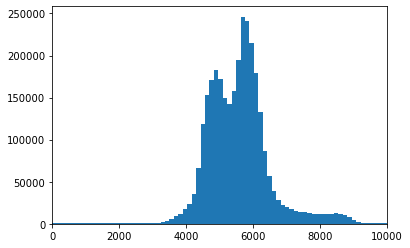

In [14]:
plt.hist(df['Teff'][abs(df['Teff']) < 9999],bins=150)
plt.xlim(0,10000)

In [15]:
df.describe()

,Teff,Fe/H,log_g,bp_1,bp_2,bp_3,bp_4,bp_5,bp_6,bp_7,...,rpe_46,rpe_47,rpe_48,rpe_49,rpe_50,rpe_51,rpe_52,rpe_53,rpe_54,rpe_55
count,3.123440e+06,3.121408e+06,3.123423e+06,3.127388e+06,3.127388e+06,3.127388e+06,3.127388e+06,3.127388e+06,3.127388e+06,3.127388e+06,...,3.127388e+06,3.127388e+06,3.127388e+06,3.127388e+06,3.127388e+06,3.127388e+06,3.127388e+06,3.127388e+06,3.127388e+06,3.127388e+06
mean,5.469821e+03,-1.005488e+02,-9.470619e+01,7.718696e+03,-1.184926e+03,3.368247e+01,-9.884548e+00,-1.292961e+01,-1.084591e+01,-1.066768e+01,...,1.228332e+00,1.041539e+00,9.955065e-01,9.119711e-01,9.275987e-01,8.168162e-01,7.341019e-01,6.663405e-01,2.659616e-01,1.410173e-01
std,4.870884e+04,9.993845e+02,9.929367e+02,9.894289e+04,2.529611e+04,7.354526e+03,4.326045e+03,1.470563e+03,8.929393e+02,1.439285e+03,...,2.156075e+01,1.919741e+01,1.847705e+01,1.754448e+01,1.665717e+01,1.522110e+01,1.354764e+01,1.223328e+01,3.987328e+00,2.595944e+00
min,-4.421388e+06,-9.999000e+03,-9.953873e+04,-1.073217e+00,-2.105524e+07,-1.199590e+06,-3.189713e+06,-2.969930e+05,-6.277550e+05,-2.010284e+06,...,6.487440e-02,6.264918e-02,4.899352e-02,4.899616e-02,5.481264e-02,4.443664e-02,4.371226e-02,4.235824e-02,1.816171e-02,1.120560e-02
25%,4.904557e+03,-4.463057e-01,3.697623e+00,5.300972e+02,-5.354285e+02,-6.666613e+01,-2.546993e+00,-2.423940e+01,-9.913883e+00,-1.276286e+01,...,2.916972e-01,2.464071e-01,2.321458e-01,2.153875e-01,2.242238e-01,1.907279e-01,1.690758e-01,1.531815e-01,7.128694e-02,3.842191e-02
50%,5.551532e+03,-2.029530e-01,4.170593e+00,1.817149e+03,-1.052149e+02,-1.398450e+01,3.222704e+00,-6.450695e+00,-8.833636e-01,-2.141584e+00,...,4.647549e-01,3.871774e-01,4.017899e-01,3.634636e-01,3.601699e-01,3.250338e-01,2.767744e-01,2.474864e-01,1.013136e-01,5.215830e-02
75%,5.999900e+03,-1.836001e-02,4.465419e+00,5.341001e+03,-5.954961e+00,1.584868e+00,2.168017e+01,-7.698307e-01,6.860557e+00,3.913026e-01,...,8.395301e-01,6.896542e-01,7.285188e-01,6.600576e-01,6.455344e-01,5.878780e-01,4.969364e-01,4.434300e-01,1.742636e-01,8.790939e-02
max,8.064998e+07,1.700287e+05,1.539518e+05,5.012911e+07,1.347105e+06,6.696551e+06,3.933293e+06,1.205107e+06,4.104831e+05,3.950480e+05,...,2.374081e+04,2.328102e+04,2.089838e+04,2.083271e+04,1.827534e+04,1.626270e+04,1.637389e+04,1.400538e+04,4.069050e+03,2.273601e+03


In [16]:
# datacuts = data[(data['RV_TEFF'] < 9999) | (data['RV_TEFF'] > 2000) | (data['TEFF_apo'] < 9999) | (data['TEFF_apo'] > 2000) |\
#                 (data['TEFF_SPEC_apoeso'] < 9999) | (data['TEFF_SPEC_apoeso'] > 2000) | (data['TEFF_eso'] < 9999) | (data['TEFF_eso'] > 2000) |\
#                 (data['teff_cal_madera'] < 9999) | (data['teff_cal_madera'] > 2000) | (data['TEFF_SPEC_ravseg'] < 9999) | (data['TEFF_SPEC_ravseg'] > 2000) |\
#                 (data['teff'] < 9999) | (data['teff'] > 2000) | (data['TEFF_PASTEL'] < 9999) | (data['TEFF_PASTEL'] > 2000) |\
#                 (data['RV_FEH'] < 5) | (data['RV_FEH'] > -5) | (data['FE_H_aers'] < 5) | (data['FE_H_aers'] > -5) |\
#                 (data['FE_H_SPEC'] < 5) | (data['FE_H_SPEC'] > -5) | (data['FEH'] < 5) | (data['FEH'] > -5) |\
#                 (data['m_h_cal_madera'] < 5) | (data['m_h_cal_madera'] > -5) | (data['FEH_SPEC'] < 5) | (data['FEH_SPEC'] > -5) |\
#                 (data['fe_h_galleg'] < 5) | (data['fe_h_galleg'] > -5) | (data['FEH_APOGEE'] < 5) | (data['FEH_APOGEE'] > -5) |\
#                 (data['FEH_PASTEL'] < 5) | (data['FEH_PASTEL'] > -5) |\
#                 (data['RV_LOGG'] < 8) | (data['RV_LOGG'] > 0) | (data['LOGG_apo'] < 8) | (data['LOGG_apo'] > 0) |\
#                 (data['LOGG_SPEC_apoeso'] < 8) | (data['LOGG_SPEC_apoeso'] > 0) | (data['LOGG_eso'] < 8) | (data['LOGG_eso'] > 0) |\
#                 (data['logg_cal_madera'] < 8) | (data['logg_cal_madera'] > 0) | (data['LOGG_SPEC_ravseg'] < 8) | (data['LOGG_SPEC_ravseg'] > 0) |\
#                 (data['logg'] < 8) | (data['logg'] > 0) | (data['LOGG_APOGEE'] < 8) | (data['LOGG_APOGEE'] > 0) |\
#                 (data['LOGG_PASTEL'] < 8) | (data['LOGG_PASTEL'] > 0)]

In [17]:
datacuts = data[((data['RV_TEFF'] < 9999) & (data['RV_TEFF'] > 2000)) | (np.isnan(data['RV_TEFF']))]
datacuts = datacuts[((datacuts['TEFF_apo'] < 9999) & (datacuts['TEFF_apo'] > 2000)) | (np.isnan(datacuts['TEFF_apo']))]
datacuts = datacuts[((datacuts['TEFF_SPEC_apoeso'] < 9999) & (datacuts['TEFF_SPEC_apoeso'] > 2000)) | (np.isnan(datacuts['TEFF_SPEC_apoeso']))]
datacuts = datacuts[((datacuts['TEFF_eso'] < 9999) & (datacuts['TEFF_eso'] > 2000)) | (np.isnan(datacuts['TEFF_eso']))]
datacuts = datacuts[((datacuts['teff_cal_madera'] < 9999) & (datacuts['teff_cal_madera'] > 2000)) | (np.isnan(datacuts['teff_cal_madera']))]
datacuts = datacuts[((datacuts['TEFF_SPEC_ravseg'] < 9999) & (datacuts['TEFF_SPEC_ravseg'] > 2000)) | (np.isnan(datacuts['TEFF_SPEC_ravseg']))]
datacuts = datacuts[((datacuts['teff'] < 9999) & (datacuts['teff'] > 2000)) | (np.isnan(datacuts['teff']))]
datacuts = datacuts[((datacuts['TEFF_PASTEL'] < 9999) & (datacuts['TEFF_PASTEL'] > 2000)) | (np.isnan(datacuts['TEFF_PASTEL']))]

datacuts = datacuts[((datacuts['RV_FEH'] < 5) & (datacuts['RV_FEH'] > -5)) | (np.isnan(datacuts['RV_FEH']))]
datacuts = datacuts[((datacuts['FE_H_aers'] < 5) & (datacuts['FE_H_aers'] > -5)) | (np.isnan(datacuts['FE_H_aers']))]
datacuts = datacuts[((datacuts['FE_H_SPEC'] < 5) & (datacuts['FE_H_SPEC'] > -5)) | (np.isnan(datacuts['FE_H_SPEC']))]
datacuts = datacuts[((datacuts['FEH'] < 5) & (datacuts['FEH'] > -5)) | (np.isnan(datacuts['FEH']))]
datacuts = datacuts[((datacuts['m_h_cal_madera'] < 5) & (datacuts['m_h_cal_madera'] > -5)) | (np.isnan(datacuts['m_h_cal_madera']))]
datacuts = datacuts[((datacuts['FEH_SPEC'] < 5) & (datacuts['FEH_SPEC'] > -5)) | (np.isnan(datacuts['FEH_SPEC']))]
datacuts = datacuts[((datacuts['fe_h_galleg'] < 5) & (datacuts['fe_h_galleg'] > -5)) | (np.isnan(datacuts['fe_h_galleg']))]
datacuts = datacuts[((datacuts['FEH_APOGEE'] < 5) & (datacuts['FEH_APOGEE'] > -5)) | (np.isnan(datacuts['FEH_APOGEE']))]
datacuts = datacuts[((datacuts['FEH_PASTEL'] < 5) & (datacuts['FEH_PASTEL'] > -5)) | (np.isnan(datacuts['FEH_PASTEL']))]

datacuts = datacuts[((datacuts['RV_LOGG'] < 8) & (datacuts['RV_LOGG'] > 0)) | (np.isnan(datacuts['RV_LOGG']))]
datacuts = datacuts[((datacuts['LOGG_apo'] < 8) & (datacuts['LOGG_apo'] > 0)) | (np.isnan(datacuts['LOGG_apo']))]
datacuts = datacuts[((datacuts['LOGG_SPEC_apoeso'] < 8) & (datacuts['LOGG_SPEC_apoeso'] > 0)) | (np.isnan(datacuts['LOGG_SPEC_apoeso']))]
datacuts = datacuts[((datacuts['LOGG_eso'] < 8) & (datacuts['LOGG_eso'] > 0)) | (np.isnan(datacuts['LOGG_eso']))]
datacuts = datacuts[((datacuts['logg_cal_madera'] < 8) & (datacuts['logg_cal_madera'] > 0)) | (np.isnan(datacuts['logg_cal_madera']))]
datacuts = datacuts[((datacuts['LOGG_SPEC_ravseg'] < 8) & (datacuts['LOGG_SPEC_ravseg'] > 0)) | (np.isnan(datacuts['LOGG_SPEC_ravseg']))]
datacuts = datacuts[((datacuts['logg'] < 8) & (datacuts['logg'] > 0)) | (np.isnan(datacuts['logg']))]
datacuts = datacuts[((datacuts['LOGG_APOGEE'] < 8) & (datacuts['LOGG_APOGEE'] > 0)) | (np.isnan(datacuts['LOGG_APOGEE']))]
datacuts = datacuts[((datacuts['LOGG_PASTEL'] < 8) & (datacuts['LOGG_PASTEL'] > 0)) | (np.isnan(datacuts['LOGG_PASTEL']))]

In [18]:
datacuts

RA_apo,DEC,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,TEFF_apo,TEFF_ERR,TEFF_SPEC_apoeso,LOGG_apo,LOGG_ERR,LOGG_SPEC_apoeso,FE_H_aers,FE_H_SPEC,FE_H_ERR,FE_H_FLAG,ALPHA_M,ALPHA_M_ERR,angDist_apo,RA_eso,DECLINATION,TEFF_eso,E_TEFF_aers,LOGG_eso,E_LOGG_aers,FEH,E_FEH,angDist_eso,ra_input,dec_input,teff_cal_madera,teff_error_madera,logg_cal_madera,logg_error_madera,m_h_cal_madera,m_h_error_madera,angDist_rav,PLUG_RA,PLUG_DEC,TEFF_SPEC_ravseg,TEFF_SPEC_UNC,LOGG_SPEC_ravseg,LOGG_SPEC_UNC,FEH_SPEC,FEH_SPEC_UNC,angDist_seg,ra_dr2,dec_dr2,teff,e_teff_galleg,logg,e_logg_galleg,fe_h_galleg,e_fe_h,flag_fe_h,alpha_fe,e_alpha_fe,flag_alpha_fe,angDist,ra_obs,dec_obs,FEH_APOGEE,AFE_APOGEE,LOGG_APOGEE,TEFF_PASTEL,LOGG_PASTEL,FEH_PASTEL,err_teff_pastel,err_feh_pastel,err_logg_pastel,err_feh_apogee,err_afe_apogee,err_logg_apogee,angDist_cds,Source,source_id,bp_coefficients,bp_coefficient_errors,rp_coefficients,rp_coefficient_errors
float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float64,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float32,float32,float32,float32,float64,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,float64,float32,float64,float32,float64,float32,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64[55],float32[55],float64[55],float32[55]
--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,160.477875,-72.41075,4843.83,49.0,3.17137,0.14,-0.148893,0.09,0.193711,--,--,--,--,--,--,--,--,--,160.47771379289205,-72.4107334841214,4858.367,78.46940456421,2.5672753,0.18932096424642417,-0.029971123,0.04768461346648433,0,0.05263154773004417,0.015983422321964195,0,0.008681,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,5229573108993469440,5229573108993469440,145.94750744804813 .. 0.13810263231675313,0.8504349 .. 0.15111844,268.3386464311491 .. -0.2806121938400895,1.1720372 .. 0.2277441
--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,155.092875,-72.08375,4860.62,49.0,2.56393,0.14,-0.164642,0.09,0.335008,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,5230071187759613952,5230071187759613952,43713.377452806184 .. -0.5681989255961662,24.355892 .. 0.481216,58221.04461371667 .. 0.5085459337157923,10.430219 .. 0.48194912
--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,155.637791666667,-73.23852777777779,4872.53,65.0,2.18477,0.17,-0.484646,0.09,0.135698,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,5229847334064135168,5229847334064135168,411.07447189578477 .. -0.0008675762364470248,0.7598407 .. 0.030707024,432.3562871894561 .. 0.015062743101020622,0.5858184 .. 0.04081152
--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,158.11922383775513,-72.73356685097986,5705.6733,90.59998552239006,4.009946,0.1818685749676078,0.06367302,0.07329341059941959,0,0.022024420506490894,0.033912959081447626,0,0.002514,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,5229221677589904384,5229221677589904384,9630.312271879011 .. -0.07628328184512552,4.899608 .. 0.10921125,10059.655518995083 .. 0.031650749196085494,2.5160778 .. 0.09333863
--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,157.22500904621955,-72.59811454249012,6488.058,79.86008662401808,4.1567492,0.17934605243204343,-0.13120508,0.08250381779529359,0,0.14607227558590782,0.03380479843961573,0,8e-05,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,5229983772283251712,5229983772283251712,14196.057270879523 .. 0.060399499830

In [19]:
teffcuts = np.nanmean([datacuts['RV_TEFF'],datacuts['TEFF_apo'],datacuts['TEFF_SPEC_apoeso'],datacuts['TEFF_eso'],datacuts['teff_cal_madera'],
                    datacuts['TEFF_SPEC_ravseg'],datacuts['teff'],datacuts['TEFF_PASTEL']],axis=0)
fehcuts = np.nanmean([datacuts['RV_FEH'],datacuts['FE_H_aers'],datacuts['FE_H_SPEC'],datacuts['FEH'],datacuts['m_h_cal_madera'],
                   datacuts['FEH_SPEC'],datacuts['fe_h_galleg'],datacuts['FEH_APOGEE'],datacuts['FEH_PASTEL']],axis=0)
loggcuts = np.nanmean([datacuts['RV_LOGG'],datacuts['LOGG_apo'],datacuts['LOGG_SPEC_apoeso'],datacuts['LOGG_eso'],datacuts['logg_cal_madera'],
                    datacuts['LOGG_SPEC_ravseg'],datacuts['logg'],datacuts['LOGG_APOGEE'],datacuts['LOGG_PASTEL']],axis=0)

/tmp/ipykernel_5095/2381094382.py:1: RuntimeWarning: Mean of empty slice
  teffcuts = np.nanmean([datacuts['RV_TEFF'],datacuts['TEFF_apo'],datacuts['TEFF_SPEC_apoeso'],datacuts['TEFF_eso'],datacuts['teff_cal_madera'],
/tmp/ipykernel_5095/2381094382.py:3: RuntimeWarning: Mean of empty slice
  fehcuts = np.nanmean([datacuts['RV_FEH'],datacuts['FE_H_aers'],datacuts['FE_H_SPEC'],datacuts['FEH'],datacuts['m_h_cal_madera'],
/tmp/ipykernel_5095/2381094382.py:5: RuntimeWarning: Mean of empty slice
  loggcuts = np.nanmean([datacuts['RV_LOGG'],datacuts['LOGG_apo'],datacuts['LOGG_SPEC_apoeso'],datacuts['LOGG_eso'],datacuts['logg_cal_madera'],


In [20]:
tdatacuts = Table([teffcuts, fehcuts, loggcuts], names=['Teff', 'Fe/H', 'log_g'])

In [21]:
bpccuts = datacuts['bp_coefficients'].data
rpccuts = datacuts['rp_coefficients'].data
bpeccuts = datacuts['bp_coefficient_errors'].data
rpeccuts = datacuts['rp_coefficient_errors'].data

In [22]:
names=["bp_1", "bp_2", "bp_3", "bp_4", "bp_5", "bp_6", "bp_7",
       "bp_8", "bp_9", "bp_10", "bp_11", "bp_12", "bp_13", "bp_14",
       "bp_15", "bp_16", "bp_17", "bp_18", "bp_19", "bp_20", "bp_21",
       "bp_22", "bp_23", "bp_24", "bp_25", "bp_26", "bp_27", "bp_28",
       "bp_29", "bp_30", "bp_31", "bp_32", "bp_33", "bp_34", "bp_35",
       "bp_36", "bp_37", "bp_38", "bp_39", "bp_40", "bp_41", "bp_42",
       "bp_43", "bp_44", "bp_45", "bp_46", "bp_47", "bp_48", "bp_49",
       "bp_50", "bp_51", "bp_52", "bp_53", "bp_54", "bp_55"
      ]
[tdatacuts.add_column(bpc,name=name) for bpc,name in zip(bpccuts.T,names)]
names=["rp_1", "rp_2", "rp_3", "rp_4", "rp_5", "rp_6", "rp_7", "rp_8",
       "rp_9", "rp_10", "rp_11", "rp_12", "rp_13", "rp_14", "rp_15",
       "rp_16", "rp_17", "rp_18", "rp_19", "rp_20", "rp_21", "rp_22",
       "rp_23", "rp_24", "rp_25", "rp_26", "rp_27", "rp_28", "rp_29",
       "rp_30", "rp_31", "rp_32", "rp_33", "rp_34", "rp_35", "rp_36",
       "rp_37", "rp_38", "rp_39", "rp_40", "rp_41", "rp_42", "rp_43",
       "rp_44", "rp_45", "rp_46", "rp_47", "rp_48", "rp_49", "rp_50",
       "rp_51", "rp_52", "rp_53", "rp_54", "rp_55"
      ]
[tdatacuts.add_column(rpc,name=name) for rpc,name in zip(rpccuts.T,names)]
names=["bpe_1", "bpe_2", "bpe_3", "bpe_4", "bpe_5", "bpe_6", "bpe_7",
       "bpe_8", "bpe_9", "bpe_10", "bpe_11", "bpe_12", "bpe_13", "bpe_14",
       "bpe_15", "bpe_16", "bpe_17", "bpe_18", "bpe_19", "bpe_20", "bpe_21",
       "bpe_22", "bpe_23", "bpe_24", "bpe_25", "bpe_26", "bpe_27", "bpe_28",
       "bpe_29", "bpe_30", "bpe_31", "bpe_32", "bpe_33", "bpe_34", "bpe_35",
       "bpe_36", "bpe_37", "bpe_38", "bpe_39", "bpe_40", "bpe_41", "bpe_42",
       "bpe_43", "bpe_44", "bpe_45", "bpe_46", "bpe_47", "bpe_48", "bpe_49",
       "bpe_50", "bpe_51", "bpe_52", "bpe_53", "bpe_54", "bpe_55"
      ]
[tdatacuts.add_column(bpec,name=name) for bpec,name in zip(bpeccuts.T,names)]
names=["rpe_1", "rpe_2", "rpe_3", "rpe_4", "rpe_5", "rpe_6", "rpe_7",
       "rpe_8", "rpe_9", "rpe_10", "rpe_11", "rpe_12", "rpe_13", "rpe_14",
       "rpe_15", "rpe_16", "rpe_17", "rpe_18", "rpe_19", "rpe_20", "rpe_21",
       "rpe_22", "rpe_23", "rpe_24", "rpe_25", "rpe_26", "rpe_27", "rpe_28",
       "rpe_29", "rpe_30", "rpe_31", "rpe_32", "rpe_33", "rpe_34", "rpe_35",
       "rpe_36", "rpe_37", "rpe_38", "rpe_39", "rpe_40", "rpe_41", "rpe_42",
       "rpe_43", "rpe_44", "rpe_45", "rpe_46", "rpe_47", "rpe_48", "rpe_49",
       "rpe_50", "rpe_51", "rpe_52", "rpe_53", "rpe_54", "rpe_55"
      ]
[tdatacuts.add_column(rpec,name=name) for rpec,name in zip(rpeccuts.T,names)];

In [23]:
tdatacuts.write('/arc/home/aydanmckay/input_catalogue_datacuts.fits', overwrite=True)

In [24]:
df = tdatacuts.to_pandas()

In [25]:
df.describe()

,Teff,Fe/H,log_g,bp_1,bp_2,bp_3,bp_4,bp_5,bp_6,bp_7,...,rpe_46,rpe_47,rpe_48,rpe_49,rpe_50,rpe_51,rpe_52,rpe_53,rpe_54,rpe_55
count,3.048424e+06,3.046392e+06,3.048407e+06,3.052372e+06,3.052372e+06,3.052372e+06,3.052372e+06,3.052372e+06,3.052372e+06,3.052372e+06,...,3.052372e+06,3.052372e+06,3.052372e+06,3.052372e+06,3.052372e+06,3.052372e+06,3.052372e+06,3.052372e+06,3.052372e+06,3.052372e+06
mean,5.577048e+03,-2.634891e-01,3.943351e+00,7.357858e+03,-1.020832e+03,-1.272248e+01,9.012935e+00,-2.096435e+01,-1.411010e+01,-1.397471e+01,...,1.165887e+00,9.814550e-01,9.366711e-01,8.612617e-01,8.744419e-01,7.647360e-01,6.908645e-01,6.261556e-01,2.537794e-01,1.347253e-01
std,8.973194e+02,4.047092e-01,8.104672e-01,9.278255e+04,1.786432e+04,4.842039e+03,3.628943e+03,1.100833e+03,8.389456e+02,1.408210e+03,...,2.086559e+01,1.841968e+01,1.794704e+01,1.723865e+01,1.613864e+01,1.461951e+01,1.303641e+01,1.166532e+01,3.837471e+00,2.436500e+00
min,2.000061e+03,-4.487347e+00,5.394999e-43,-9.222329e-01,-1.205822e+07,-1.199590e+06,-1.112137e+06,-2.969930e+05,-6.277550e+05,-2.010284e+06,...,6.487440e-02,6.264918e-02,5.036612e-02,4.899616e-02,5.481264e-02,4.443664e-02,4.371226e-02,4.235824e-02,1.816171e-02,1.120560e-02
25%,4.931297e+03,-4.365800e-01,3.731489e+00,5.542182e+02,-5.449864e+02,-6.791741e+01,-2.434634e+00,-2.466525e+01,-1.019571e+01,-1.299090e+01,...,2.950870e-01,2.490321e-01,2.358686e-01,2.184742e-01,2.268917e-01,1.935275e-01,1.711864e-01,1.549902e-01,7.183293e-02,3.864913e-02
50%,5.565683e+03,-2.011775e-01,4.176177e+00,1.859336e+03,-1.100435e+02,-1.459350e+01,3.439440e+00,-6.727625e+00,-9.869794e-01,-2.245545e+00,...,4.684365e-01,3.899469e-01,4.055452e-01,3.665954e-01,3.629799e-01,3.278607e-01,2.789443e-01,2.493684e-01,1.019005e-01,5.241395e-02
75%,6.002468e+03,-2.087202e-02,4.464645e+00,5.383841e+03,-6.678716e+00,1.209843e+00,2.228209e+01,-8.969485e-01,6.854657e+00,3.660876e-01,...,8.414018e-01,6.906598e-01,7.303232e-01,6.616741e-01,6.469117e-01,5.892788e-01,4.978506e-01,4.441845e-01,1.744707e-01,8.799453e-02
max,9.996015e+03,4.786726e+00,7.899983e+00,5.012911e+07,1.347105e+06,2.938367e+06,3.933293e+06,8.611303e+05,4.104831e+05,2.856612e+05,...,2.374081e+04,2.328102e+04,2.089838e+04,2.083271e+04,1.827534e+04,1.626270e+04,1.637389e+04,1.400538e+04,4.069050e+03,2.273601e+03


For the Final input catalogue, add the pristine spectroscopic data, Gaia RVS,
verify the inputs/coefficients so that they aren't impossible.